# 06b: CNN-LSTM Model Optimization and Evaluation

This notebook evaluates the trained CNN-LSTM model, performs hyperparameter tuning, and visualizes results. The workflow includes:

- Loading test data and trained model
- Computing evaluation metrics (AUROC, AUPRC, confusion matrix)
- Plotting ROC and Precision-Recall curves
- (Optional) Hyperparameter tuning and advanced analysis

In [ ]:
# Imports and Configuration
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import pickle


In [ ]:
# Load data and model
data = np.load('../data/processed/cnn_lstm_data.npz', allow_pickle=True)
X_test, y_test = data['X_test'], data['y_test']
static_test = data['static_test']

# Sanity check: ensure all arrays are aligned
print('X_test shape:', X_test.shape)
print('static_test shape:', static_test.shape)
print('y_test shape:', y_test.shape)

# static_test must be aligned with X_test and y_test
model = load_model('cnn_lstm_best_model.h5')

X_test shape: (800, 202, 24)
static_test shape: (800, 9)
y_test shape: (800,)


## 1. Model Evaluation: AUROC, AUPRC, Confusion Matrix

In [2]:
# Predict
y_pred_prob = model.predict([X_test, static_test]).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
auroc = roc_auc_score(y_test, y_pred_prob)
auprc = average_precision_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"AUROC: {auroc:.3f}")
print(f"AUPRC: {auprc:.3f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
AUROC: 0.999
AUPRC: 0.995
Confusion Matrix:
 [[673  16]
 [  0 111]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       689
         1.0       0.87      1.00      0.93       111

    accuracy                           0.98       800
   macro avg       0.94      0.99      0.96       800
weighted avg       0.98      0.98      0.98       800

AUROC: 0.999
AUPRC: 0.995
Confusion Matrix:
 [[673  16]
 [  0 111]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       689
         1.0       0.87      1.00      0.93       111

    accuracy                           0.98       800
   macro avg       0.94      0.99      0.96       800
weighted avg       0.98      0.98      0.98       800



## 2. ROC and Precision-Recall Curves

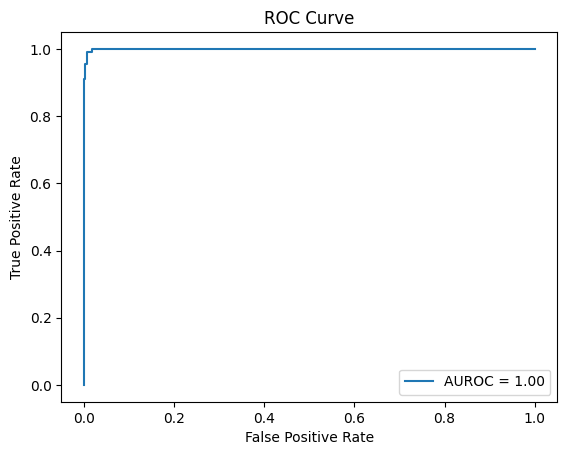

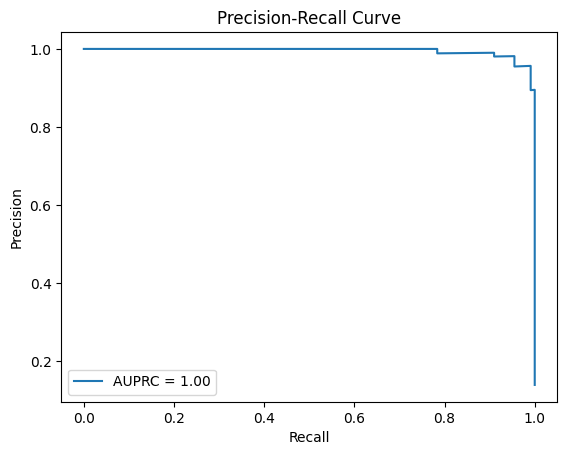

In [ ]:
# ROC Curve 
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'AUROC = {auroc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Chance')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Precision-Recall Curve 
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color='darkred', lw=2, label=f'AUPRC = {auprc:.2f}')
plt.hlines(y=np.mean(y_test), xmin=0, xmax=1, color='gray', lw=1, linestyle='--', label='Prevalence')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc='lower left', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()